In [10]:
from NNetwork.NNetwork import NNetwork
import numpy as np
import pandas as pd
import networkx as nx
import random
import seaborn as sns
from scipy.stats import bernoulli

In [54]:
"""
input: 
    G: nnetwork
    s: current state (array) 
    k: total number of FCA color
    p1: the probability of each vertex's neighbors presenting in the network
    p2: the probability of each vertex's blinking neighbors presenting in the network
    (if both p1 and p2 are set to 1, no stochasticity is given to the network)
    iteration: number of iteration
"""
def FCA(G, s, k, p1, p2, iteration):
    b = (k-1)//2 #blinking color
    ret = s #storing the output value
    s_next = np.zeros(G.number_nodes)
    
    for h in range(iteration):
        if h != 0:
            s = s_next #update to the newest state
            ret = np.vstack((ret, s_next))
            
        s_next = np.zeros(G.number_nodes)
        
        for i in range(G.number_nodes):
            #randomly select the current node's neighbors
            neighblist = G.neighbors(G.vertices[i]) #storing the neighbor list of the current node
            neighb_len = sum(bernoulli.rvs(p1, size=len(neighblist))) #flip a coin: randomly generate a number smaller than total number of nodes
            neighblist = random.sample(neighblist, neighb_len) #get the subset of neighborlist
            
            flag = False #true if inhibited by the blinking neighbor
            
            if s[i]>b:
                neigh_b = 0 #storing the number of blinking neighbors
                for j in range(G.number_nodes):
                    if s[j] == b and G.vertices[j] in neighblist:
                        neigh_b += 1
                
                #randomly select the current node's blinking neighbors
                if sum(bernoulli.rvs(p2, size=neigh_b)) > 0:
                    flag = True
                    
#                     if s[j] == b and G.vertices[j] in neighblist:#G.neighbors(G.vertices[i])
#                         neighb_len = sum(bernoulli.rvs(p2, size=len(neighblist))) #flip a coin: randomly generate a number smaller than total number of nodes
#                         neighblist = random.sample(neighblist, neighb_len) #select k element from the list
#                         for a in range(G.number_nodes):
#                             if s[a] == b and G.vertices[a] in neighblist:
#                                 flag = True
                if flag:
                    s_next[i] = s[i]
                else:
                    s_next[i] = (s[i]+1)%k
            else:
                s_next[i] = (s[i]+1)%k
    return ret

In [58]:
# a(0) --- b(2)
edgelist = [['a', 'b']]
G = NNetwork()
G.add_edges(edgelist)
ret = FCA(G, [0, 2], 4, 1, 1, 10)
ret

array([[0., 2.],
       [1., 3.],
       [2., 3.],
       [3., 0.],
       [0., 1.],
       [1., 2.],
       [2., 2.],
       [3., 3.],
       [0., 0.],
       [1., 1.]])

In [59]:
ret = FCA(G, [1, 3], 6, 1, 1, 10)
ret

array([[1., 3.],
       [2., 4.],
       [3., 4.],
       [4., 5.],
       [5., 0.],
       [0., 1.],
       [1., 2.],
       [2., 3.],
       [3., 3.],
       [4., 4.]])

In [60]:
edgelist = [['a','b'], ['a', 'c'], ['b', 'c'], ['b', 'd'], ['c', 'e'], ['d', 'e']]
G = NNetwork()
G.add_edges(edgelist)
FCA(G, [1, 2, 3, 1, 4], 6, 1, 1, 20)

array([[1., 2., 3., 1., 4.],
       [2., 3., 3., 2., 5.],
       [3., 3., 3., 3., 5.],
       [4., 4., 4., 4., 0.],
       [5., 5., 5., 5., 1.],
       [0., 0., 0., 0., 2.],
       [1., 1., 1., 1., 3.],
       [2., 2., 2., 2., 4.],
       [3., 3., 3., 3., 4.],
       [4., 4., 4., 4., 5.],
       [5., 5., 5., 5., 0.],
       [0., 0., 0., 0., 1.],
       [1., 1., 1., 1., 2.],
       [2., 2., 2., 2., 3.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.],
       [5., 5., 5., 5., 5.],
       [0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.]])

In [61]:
edgelist = [['1', '0'], ['2', '0'], ['3', '0'], ['4', '0'], ['5', '0'], ['6', '0']]
G = NNetwork()
G.add_edges(edgelist)
ret = FCA(G, [3, 0, 1, 2, 3, 4, 5], 6, 1, 1, 3)
ret

array([[3., 0., 1., 2., 3., 4., 5.],
       [4., 1., 2., 3., 4., 5., 0.],
       [5., 2., 3., 4., 5., 0., 1.]])

In [63]:
edgelist = [['0', '2'], ['0', '4'], ['0', '5'], ['2', '4'], ['2', '5'], ['5', '4']]
G = NNetwork()
G.add_edges(edgelist)
ret = FCA(G, [0,2,4,5], 6, 1, 1, 5)
ret

array([[0., 2., 4., 5.],
       [1., 3., 4., 5.],
       [2., 4., 5., 0.],
       [3., 4., 5., 1.],
       [4., 5., 0., 2.]])

<AxesSubplot:>

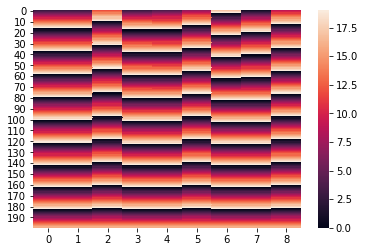

In [78]:
edgelist = [['a', 'b'], ['b', 'c'], ['d', 'e'], ['e', 'f'], ['g', 'h'], ['h', 'i'],
            ['a', 'd'], ['d', 'g'], ['b', 'e'], ['e', 'h'], ['c', 'f'], ['f', 'i']]
G = NNetwork()
G.add_edges(edgelist)
S = []
for i in range(9):
    S.append(random.randint(0, 20))
ret = FCA(G, S, 20, 1, 1, 200)
df = pd.DataFrame(ret)
sns.heatmap(df)

<AxesSubplot:>

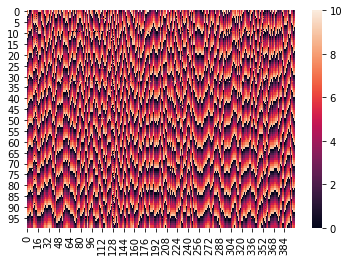

In [81]:
#generate a grid 2d graph with 400 nodes
G = nx.grid_2d_graph(10, 40)
G.edges()
new_nodes = {e: n for n, e in enumerate(G.nodes, start=1)}
new_edges = [(new_nodes[e1], new_nodes[e2]) for e1, e2 in G.edges]
edgelist = [] #update the formate of edgelist to match with NNetwork input
for i in range(len(new_edges)):
    temp = [str(new_edges[i][0]), str(new_edges[i][1])]
    edgelist.append(temp)
G = NNetwork()
G.add_edges(edgelist)

S = []
for i in range(400):
    S.append(random.randint(0, 10))
ret = FCA(G, S, 10, 1, 0.5, 100)
df = pd.DataFrame(ret)
sns.heatmap(df)

<AxesSubplot:>

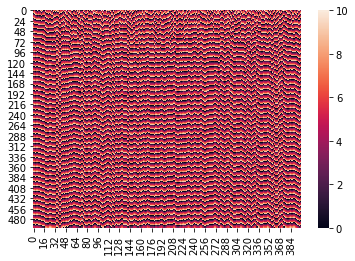

In [80]:
ret = FCA(G, S, 10, 1, 1, 100)
df = pd.DataFrame(ret)
sns.heatmap(df)

<AxesSubplot:>

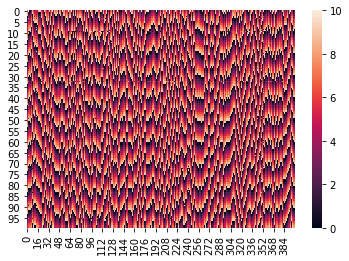

In [82]:
ret = FCA(G, S, 10, 1, 0.2, 100)
df = pd.DataFrame(ret)
sns.heatmap(df)